# Titanic: Machine Learning from Disaster
### Predict survival on the Titanic
- Defining the problem statement
- Collecting the data
- Exploratory data analysis
- Feature engineering
- Modelling
- Testing

## 1. Defining the problem statement
Complete the analysis of what sorts of people were likely to survive.  
In particular, we ask you to apply the tools of machine learning to predict which passengers survived the Titanic tragedy.

In [3]:
from IPython.display import Image
Image(url= "https://enlightenedwomen.org/wp-content/uploads/2012/01/titanic.jpg")

## 2. Collecting the data

Training data set and testing data set are given by Kaggle
you can download from  
my github [https://github.com/tullshaun/MachineLearning/tree/master/TitanicData)  
or you can download from kaggle directly [kaggle](https://www.kaggle.com/c/titanic/data)  

### Import the Classifers
For this challenge lets import more classifiers and compare the one with the best accuracy

In [4]:
import numpy as np
import pandas as pd

##importing the classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


##import the train test split
from sklearn.model_selection import train_test_split

##importing the scoring metrics
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score, f1_score,roc_curve, auc
 
##importing the Visualisations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

C:\Users\tulls\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### Import the Datasets
The datasets are split into csv files called train.csv and test.csv

In [5]:
train = pd.read_csv('c:\\ml\\train.csv')
test = pd.read_csv('c:\\ml\\test.csv')


### Review the Data
Compare both  CSV files by running head() against both and see how they differ. All the same columns present?

### Data Dictionary
- **Survived:** 	0 = No, 1 = Yes  
- **pclass:** 	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd  	
- **sibsp:**	# of siblings / spouses aboard the Titanic  	
- **parch:**	# of parents / children aboard the Titanic  	
- **ticket:**	Ticket number	
- **cabin:**	Cabin number	
- **embarked:**	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton  

In [12]:
train.head(20) #### return the top 20 observations and see the types of data present

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
print(train.describe())  # examine the distribution of data including, count, mean, std=standard deviation, remember this can only do numerical data


       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [13]:
train.info()
train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Analysis of total observations and columns

- We can see that there are 891 observations and 12 columns in our training dataset.<br>
- We can see that out of 891 rows, the Age value is present only in 714 rows.<br>
- Similarly, Cabin values are also missing in many rows. Only 204 out of 891 rows have Cabin values.<br>
- Embarked is missing a value in 2 rows

### Complete the analysis of what sorts of people were likely to survive.
Check Features! <br>
- Sex (which sex was likely to survive?) <br>
- Age  (missing values may be able to be filled in with a median value) <br>
- Name (Titles of Mrs, Miss etc may be able to help you decide whether a child or adult, to complete the median age)<br>
- pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd    (Which class was likely to survive)<br>
- sibsp: # of siblings / spouses aboard the Titanic <br>
- parch: # of parents / children aboard the Titanic <br>
- ticket: Ticket number <br>
- cabin: Cabin number <br>
- embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton <br>


### Lets see how many survived in the training dataset.

In [9]:
print('-----------------Titanic Survivors--------------------------------')
Survived = train[train['Survived'] == 1]
Died = train[train['Survived'] == 0]
print('Died: {}'.format(len(train[train['Survived'] == 0])))
print('Survived: {}'.format(len(train[train['Survived'] == 1])))

-----------------Titanic Survivors--------------------------------
Died: 549
Survived: 342


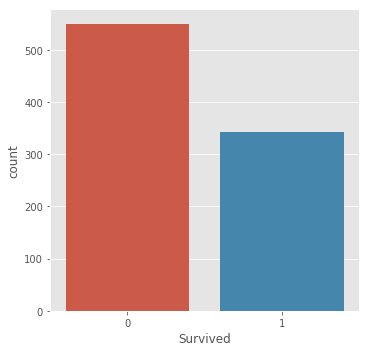

In [10]:
sns.catplot(x="Survived", kind="count",  data=train);

### Lets see if sex could predict your survival rate.

Text(0.5,1,'Survivors on the Titanic by Male & Female')

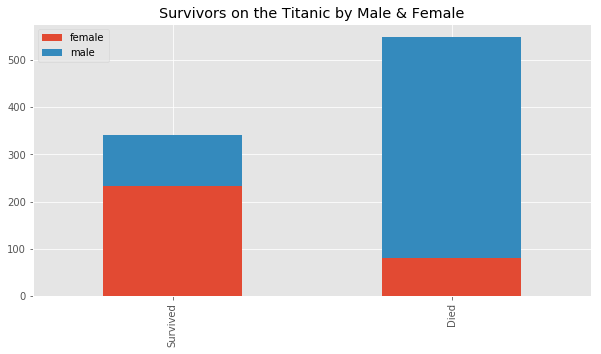

In [15]:
survived = train[train['Survived']==1]['Sex'].value_counts()
died = train[train['Survived']==0]['Sex'].value_counts()
df = pd.DataFrame([survived,died])
df.index = ['Survived','Died']
df.plot(kind='bar',stacked=True, figsize=(10,5))
plt.title('Survivors on the Titanic by Male & Female')